# Summary of VIS

This notebook contains a list of Python methods that were introduced in the VIS programming exercises.

### Import the libraries

In [1]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
df_stocks = pd.read_csv('../datasets/stocks-monthly.csv',parse_dates=[0]).set_index('Date')

## A simple plot

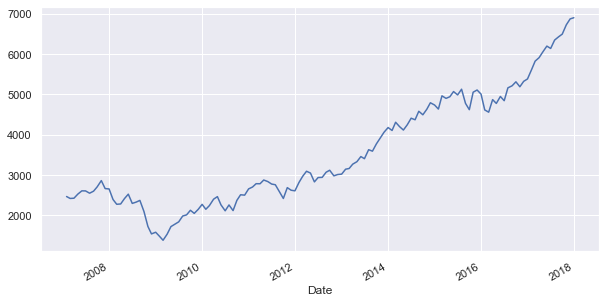

In [3]:
df_stocks['NASDAQ'].plot();

## Title, axis labels, legend


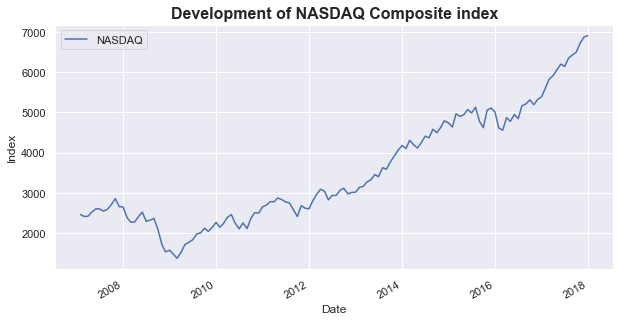

In [4]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title("Development of NASDAQ Composite index", size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel("Index")
ax_nasdaq.legend(['NASDAQ']);

## Saving a plot


In [5]:
ax_nasdaq.get_figure().savefig('NASDAQ-composite.png')

## Line styles, colors, marker styles
### Line styles


In [6]:
mpl.lines.lineStyles

{'-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing',
 ' ': '_draw_nothing',
 '': '_draw_nothing'}

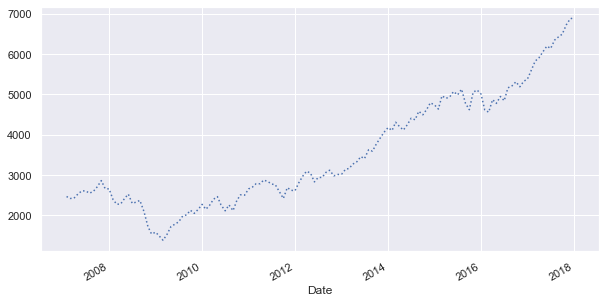

In [7]:
ax_nasdaq = df_stocks['NASDAQ'].plot(linestyle=':')

### Marker styles


In [8]:
mpl.markers.MarkerStyle.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

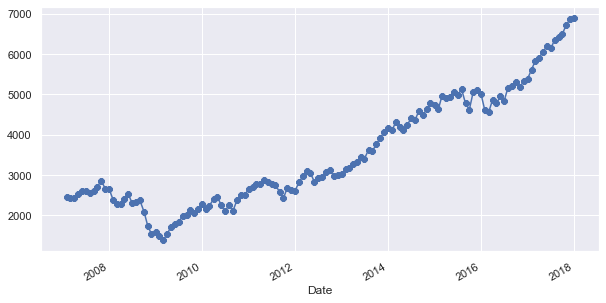

In [9]:
ax_nasdaq = df_stocks['NASDAQ'].plot( marker='8' )

### Colors


In [10]:
mpl.colors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

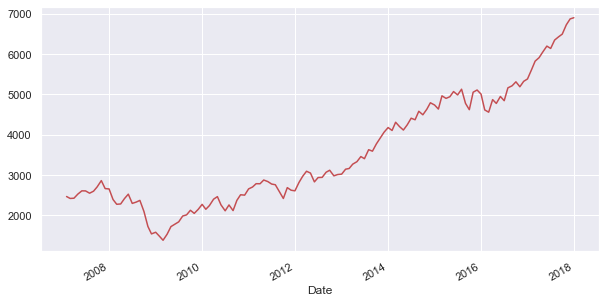

In [11]:
ax_nasdaq = df_stocks['NASDAQ'].plot(color="r")

In [12]:
mpl.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

## Plot range limits and plot size


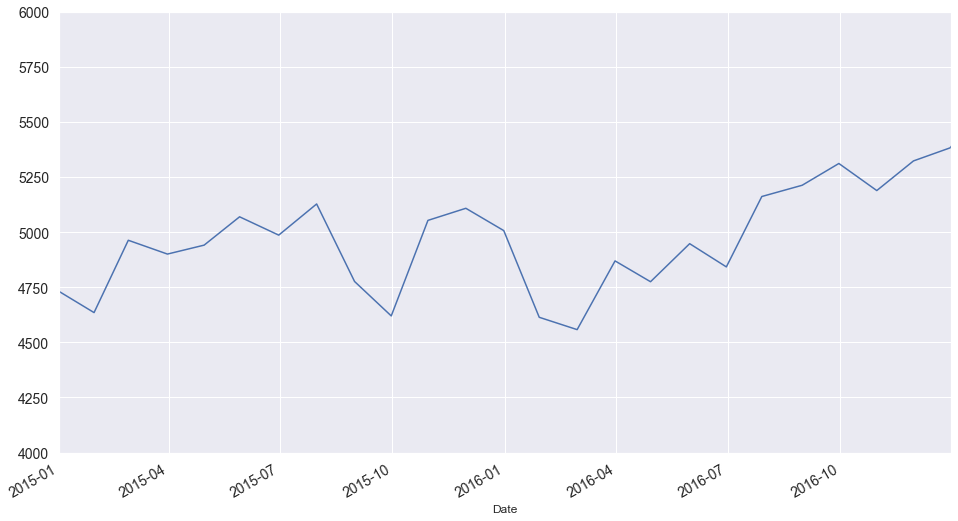

In [13]:
ax_nasdaq = df_stocks['NASDAQ'].plot(figsize=(16,9))
ax_nasdaq.tick_params(labelsize=14)
ax_nasdaq.set_ylim(4000,6000)
ax_nasdaq.set_xlim('2015-01-01', '2016-12-31');

## Text and annotation


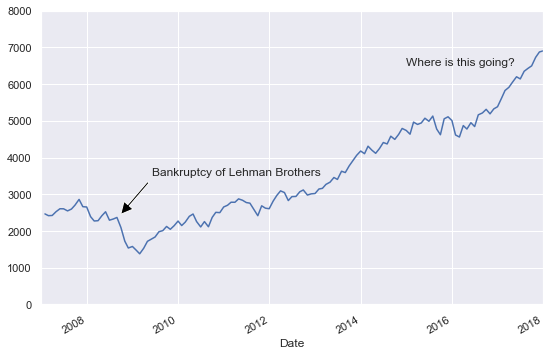

In [14]:
ax = df_stocks['NASDAQ'].plot(figsize=(9,6))
ax.set_ylim(0,8000)
ax.set_xlim('2007-01-01', '2018-01-01');  # limit the x-range

ax.text('2015-01-01', 6500, 'Where is this going?')  # add text; can use LaTeX; needs doubled backslashes
arrow = {'facecolor':'black', 'width':2, 'shrink':0.05}  # arrow properties
ax.annotate('Bankruptcy of Lehman Brothers', xy=('2008-09-15',2400), xytext=('2009-06-06',3500), arrowprops=arrow);  # add annotation

## Combining multiple plots


### Superimposing


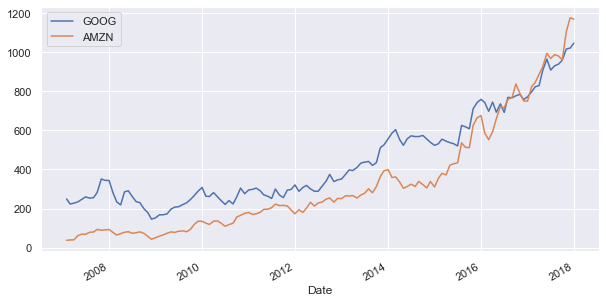

In [15]:
ax_combined = df_stocks['GOOG'].plot()
df_stocks['AMZN'].plot(ax=ax_combined)
ax_combined.legend(['GOOG', 'AMZN']);

### Juxtaposition (subplots)


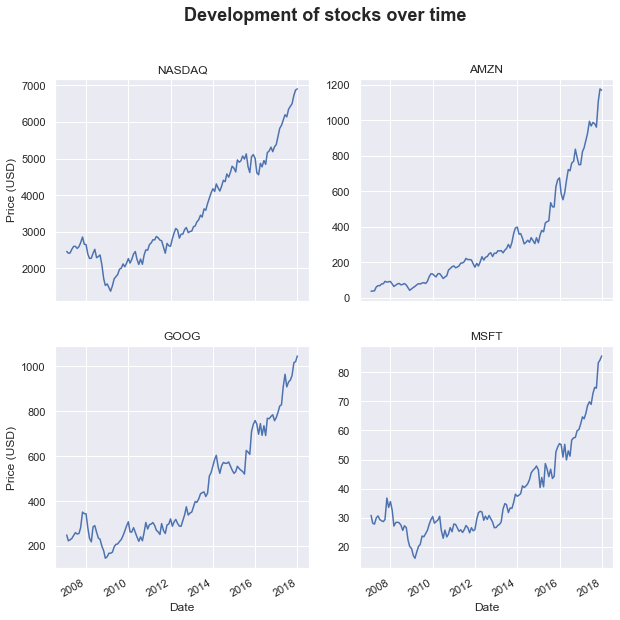

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False, sharex=True, figsize=(10,10))
df_stocks['NASDAQ'].plot(ax=ax[0, 0])
df_stocks['AMZN'].plot(ax=ax[0, 1])
df_stocks['GOOG'].plot(ax=ax[1, 0])
df_stocks['MSFT'].plot(ax=ax[1, 1]);
ax[0, 0].set_title('NASDAQ')
ax[0, 1].set_title('AMZN')
ax[1, 0].set_title('GOOG')
ax[1, 1].set_title('MSFT')
ax[0, 0].set_ylabel('Price (USD)')
ax[1, 0].set_ylabel('Price (USD)')
fig.suptitle("Development of stocks over time", size=18, weight='bold');

## Scatter plots
### Scatter matrix


In [17]:
df_sd = pd.DataFrame(((x, v, c, e, not c)
                      for c in (False, True)
                      for x in np.random.sample(5000 if c else 20000)
                      for e in np.random.sample(1)
                      for v in [x**3 + (e-0.5)/10 if c else x + (e - 0.8)*0.7]
                      if 0 <= v < 1),
                     columns=list('abcef'))

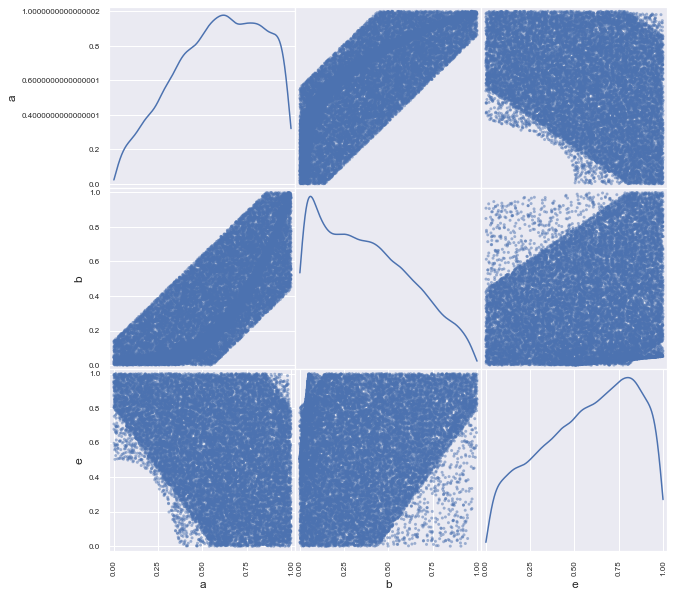

In [18]:
# scatter matrix for pairs of colums 'a', 'b', and 'e'
pd.plotting.scatter_matrix(df_sd[['a', 'b', 'e']], diagonal='density', figsize=(10,10));

### Transparency (alpha setting), point size


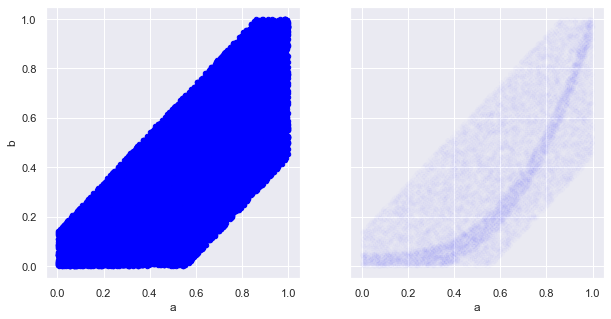

In [19]:
# effect of alpha (transparency: 0 = transparent; 1 = opaque)
fig, ax = plt.subplots(ncols=2, sharey=True)
df_sd.plot(kind='scatter', x='a', y='b', c='blue', alpha=1, ax=ax[0])  # too high
df_sd.plot(kind='scatter', x='a', y='b', c='blue', alpha=0.005, ax=ax[1]);  # a bit low

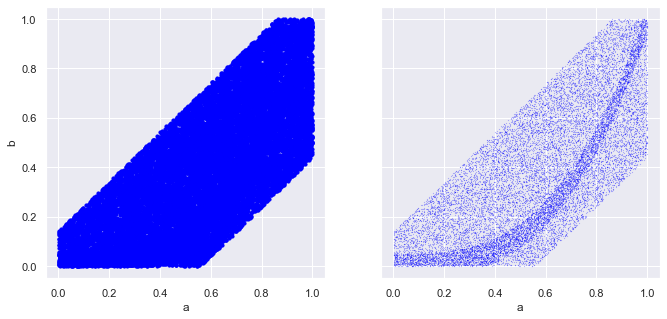

In [20]:
# effect of size (s=)
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(11, 5))
df_sd.plot(kind='scatter', x='a', y='b', c='blue', s=10, ax=ax[0])  # too high
df_sd.plot(kind='scatter', x='a', y='b', c='blue', s=.01, ax=ax[1]);  # a bit low

### Modulating dot color or size


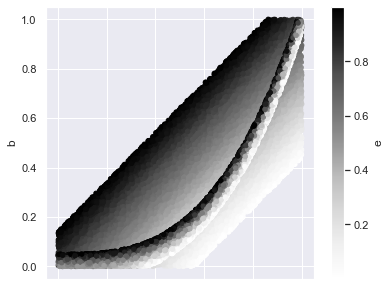

In [21]:
# modulate color (c=) by value in column 'e'
df_sd.plot(kind='scatter', x='a', y='b', c='e', figsize=(6,5));

## Plotting grouped data


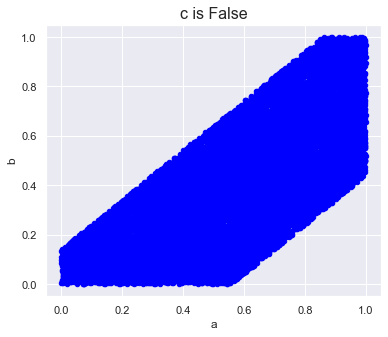

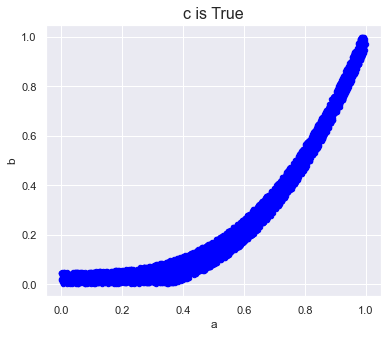

In [22]:
ax = df_sd.groupby('c').plot(kind='scatter', x='a', y='b', c="blue", figsize=(6, 5))
ax[0].set_title('c is False', size=16)
ax[1].set_title('c is True' , size=16);

In [23]:
colors = {True: "k", False: "r"}

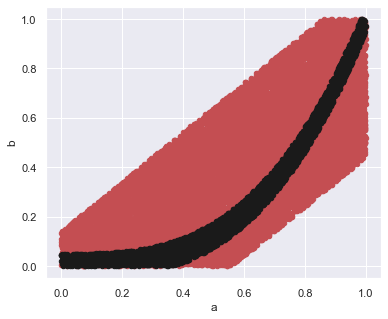

In [24]:
fig, ax = plt.subplots(figsize=(6, 5))
for name, group in df_sd.groupby('c'):
    group.plot(kind='scatter', x='a', y='b', c=colors[name], ax=ax)

# Seaborn and Pandas

In [25]:
iris = pd.read_csv('../datasets/iris.csv')
iris1 = iris[iris['species'] == 'Iris-setosa']
iris2 = iris[iris['species'] == 'Iris-versicolor']
iris3 = iris[iris['species'] == 'Iris-virginica']
iris2 = iris2.reset_index(drop=True)
iris3 = iris3.reset_index(drop=True)

### Histogram and density plot


c:\Users\mail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


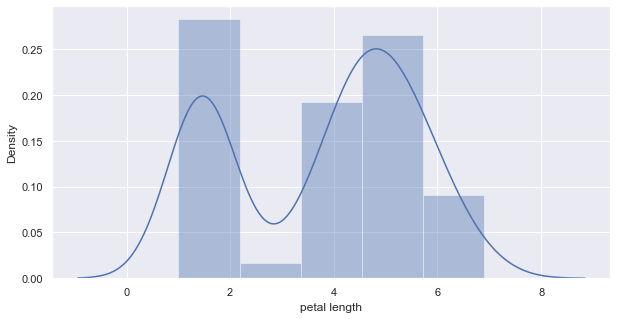

In [26]:
sns.distplot(iris['petal length']);

c:\Users\mail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


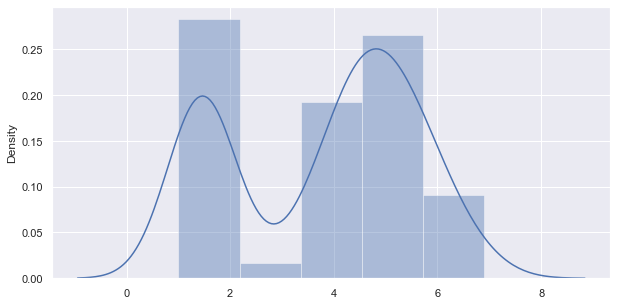

In [27]:
sns.distplot(iris[['petal length']]);

c:\Users\mail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


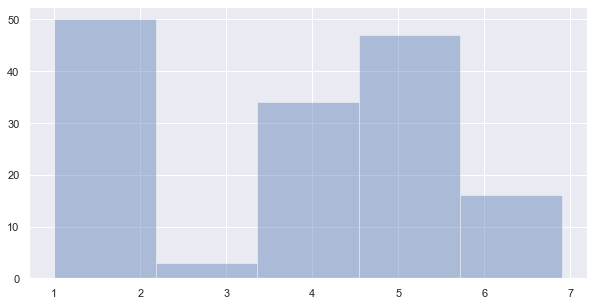

In [28]:
sns.distplot(iris[['petal length']], kde=False);

c:\Users\mail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


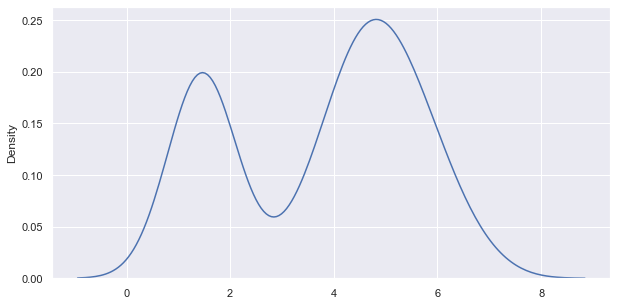

In [29]:
sns.distplot(iris[['petal length']], hist=False);

## Strip plot


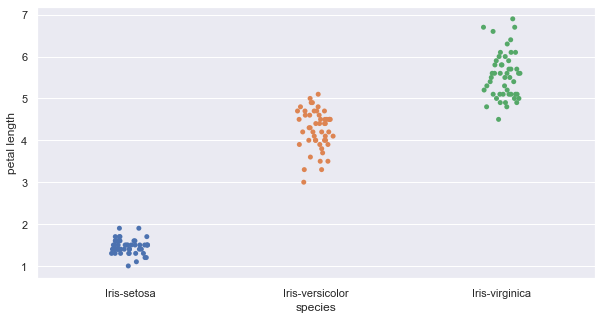

In [30]:
sns.stripplot(data=iris, x='species', y='petal length', jitter=True);

## Violin plot


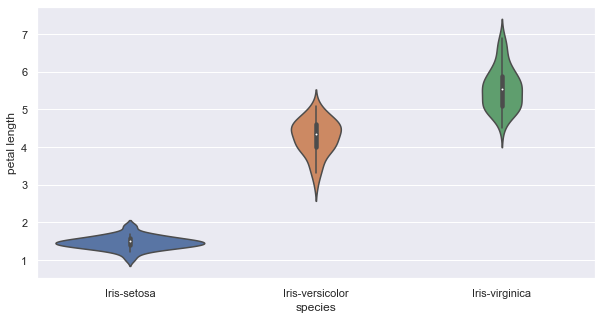

In [31]:
sns.violinplot(data=iris, x='species', y='petal length');

## Heat map


In [32]:
levels = ["tiny", "small", "medium", "big", "large"]
iris["petal width level"] = pd.cut(iris["petal width"], len(levels), labels=levels)
iris["petal length level"] = pd.cut(iris["petal length"], len(levels), labels=levels)
iris_grouped = iris.groupby(["petal width level", "petal length level"]).count()
iris_grouped["count"] = iris_grouped["species"].fillna(0)
iris_matrix = iris_grouped["count"].unstack()

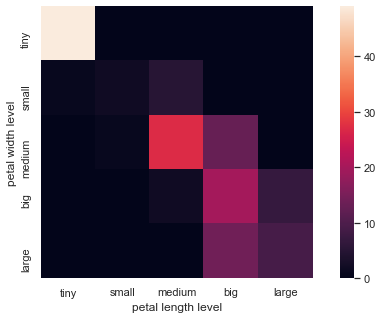

In [33]:
sns.heatmap(iris_matrix, square=True);